# importing the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# loading the dataset

In [5]:
Attrition_DT = pd.read_csv(r"C:\Users\dell\Desktop\Current\Machine Learning\Python Programs\PYTHON_DATA\HR_ATTRITION.csv")

In [6]:
Attrition_DT.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [7]:
Attrition_DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
Age                         2940 non-null int64
Attrition                   2940 non-null object
BusinessTravel              2940 non-null object
DailyRate                   2940 non-null int64
Department                  2940 non-null object
DistanceFromHome            2940 non-null int64
Education                   2940 non-null int64
EducationField              2940 non-null object
EmployeeCount               2940 non-null int64
EmployeeNumber              2940 non-null int64
EnvironmentSatisfaction     2940 non-null int64
Gender                      2940 non-null object
HourlyRate                  2940 non-null int64
JobInvolvement              2940 non-null int64
JobLevel                    2940 non-null int64
JobRole                     2940 non-null object
JobSatisfaction             2940 non-null int64
MaritalStatus               2940 non-null object
MonthlyIncome         

# creating the Target Class

In [8]:
Attrition_DT['Attrition'] = Attrition_DT['Attrition'].map({'Yes':1, 'No':0})

In [9]:
Attrition_DT.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [10]:
Attrition_DT.Attrition.value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [11]:
X_features = Attrition_DT.drop(['Attrition'], axis = 1)
X_features = X_features.columns

In [12]:
encoded_Attrition_DT = pd.get_dummies(Attrition_DT[X_features],drop_first = True)

In [13]:
import statsmodels.api as sm 
Y = Attrition_DT.Attrition
X = encoded_Attrition_DT

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size =0.5)

# Build the Decision Tree Model

In [15]:
# Decision tree with depth = 2
from sklearn.tree import DecisionTreeClassifier
model_dt_2 = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8462585034013606
Testing score:  0.8462585034013606


In [59]:
# Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.8707482993197279
Testing score:  0.854421768707483


In [60]:
# Decision tree with depth = 8 and criterion = gini
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.9523809523809523
Testing score:  0.8768707482993198


In [61]:
# Decision tree with depth = 8 and criterion = entropy
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "entropy")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.972108843537415
Testing score:  0.8782312925170068


In [62]:
predictions = model_dt_8.predict(x_test)
print(predictions)

[0 0 1 ... 0 0 0]


In [63]:
print (model_dt_8.score(x_test, y_test))
y_actual_result = y_test[10]

0.8782312925170068


In [64]:
y_pred_dt = model_dt_8.predict_proba(x_test)[:, 1]

# Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[1161   81]
 [  98  130]]


In [66]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [67]:
from sklearn import metrics
def draw_cm(y_test, predictions):
    cm = metrics.confusion_matrix(y_test, predictions, [0,1])
    sn.heatmap(cm, annot=True, fmt='0.2f',
               xticklabels = ["0","1"],
               yticklabels = ["0","1"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

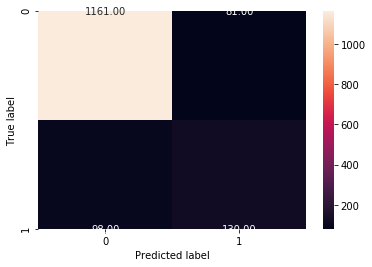

In [68]:
draw_cm(y_test,predictions)

# ROC CURVE

In [69]:
from sklearn.metrics import roc_curve, auc
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

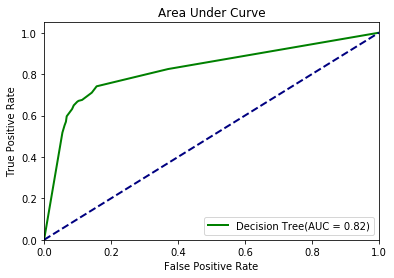

In [70]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()